# DATA 604: Modeling and Simulation in Python - Final Project

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [4]:
import simpy

def main():
    env = simpy.Environment()
    env.process(traffic_light(env))
    env.run(until=120)
    print("Simulation complete")
    
def traffic_light(env):
    while True:
        print("Light turned GRN at t= "+str(env.now))
        yield env.timeout(30)
        print("Light turned YEL at t= "+str(env.now))
        yield env.timeout(5)
        print("Light turned RED at t= "+str(env.now))
        yield env.timeout(20)
        
if __name__ == '__main__':
    main()
    
    

Light turned GRN at t= 0
Light turned YEL at t= 30
Light turned RED at t= 35
Light turned GRN at t= 55
Light turned YEL at t= 85
Light turned RED at t= 90
Light turned GRN at t= 110
Simulation complete


Using SimPy, write a process simulation that includes waiting time (discrete event simulation).  You may use any topic of interest to you.  Write the simulation and all of the following in Jupyter.

Each element is worth 5 points and will be graded using the rubric shown here.

1.  State the problem and its significance.

2.  Provide a flow-chart model. 

3.  Simulate the process for the appropriate number of iterations (justify)

In [25]:
import simpy
import numpy as np

def factory_run(env, repairers, spares):
    global cost
    
    cost = 0.0
    
    for i in range(50):
        env.process(operate_machine(env, repairers, spares))
    while True:
        cost += 3.75*8*repairers.capacity + 30*spares.capacity
        yield env.timeout(8.0)
               
def operate_machine(env, repairers, spares):
    global cost
    
    while True:
        yield env.timeout(time_to_failure())
        t_broken = env.now
        print('{:.2f} machine broke'.format(t_broken))
        
        #Launch repair process
        env.process(repair_machine(env, repairers, spares))        
        yield spares.get(1)
        t_replaced = env.now
        print('{:.2f} machine replaced'.format(t_replaced))
        cost += 20*(t_replaced-t_broken)

def repair_machine(env, repairers, spares):
    with repairers.request() as request:
        yield request
        yield env.timeout(generate_repair_time())
        yield spares.put(1)
    print('{:.2f} repair complete'.format(env.now))
    
def generate_time_to_failure():
    return np.random.uniform(132, 182)

def generate_repair_time():
    return np.random.uniform(4, 10)

obs_time = []
obs_cost = []
obs_spares = []

def observe(env, spares):
    while True:
        obs_time.append(env.now)
        obs_cost.append(cost)
        obs_spares.append(spares.level)
        yield env.timeout(1.0)  
        
np.random.seed(0)

env = simpy.Environment()
repairers = simpy.Resource(env, capacity=3)
spares = simpy.Container(env, init=20, capacity=20)

env.process(factory_run(env, repairers, spares))
env.process(observe(env, spares))

env.run(until=8*5*52)


132.94 machine broke
132.94 machine replaced
133.01 machine broke
133.01 machine replaced
135.01 machine broke
135.01 machine replaced
135.55 machine broke
135.55 machine replaced
136.36 machine broke
136.36 machine replaced
137.62 repair complete
137.91 machine broke
137.91 machine replaced
138.45 machine broke
138.45 machine replaced
139.17 machine broke
139.17 machine replaced
139.57 repair complete
139.98 repair complete
142.52 machine broke
142.52 machine replaced
144.42 repair complete
144.81 repair complete
145.23 machine broke
145.23 machine replaced
147.51 repair complete
147.77 machine broke
147.77 machine replaced
149.98 machine broke
149.98 machine replaced
150.19 machine broke
150.19 machine replaced
150.63 repair complete
151.17 machine broke
151.17 machine replaced
152.73 machine broke
152.73 machine replaced
153.18 machine broke
153.18 machine replaced
153.73 repair complete
153.85 machine broke
153.85 machine replaced
153.88 machine broke
153.88 machine replaced
154.81

1420.45 machine replaced
1423.74 repair complete
1424.53 machine broke
1424.53 machine replaced
1424.92 machine broke
1424.92 machine replaced
1428.23 repair complete
1428.78 machine broke
1428.78 machine replaced
1428.94 repair complete
1429.75 repair complete
1431.17 machine broke
1431.17 machine replaced
1431.87 machine broke
1431.87 machine replaced
1432.38 machine broke
1432.38 machine replaced
1434.18 machine broke
1434.18 machine replaced
1434.33 repair complete
1437.63 repair complete
1438.82 repair complete
1442.87 repair complete
1443.20 machine broke
1443.20 machine replaced
1443.38 machine broke
1443.38 machine replaced
1443.52 repair complete
1446.77 repair complete
1448.17 machine broke
1448.17 machine replaced
1449.98 repair complete
1450.29 machine broke
1450.29 machine replaced
1450.34 machine broke
1450.34 machine replaced
1450.85 repair complete
1454.21 repair complete
1455.38 machine broke
1455.38 machine replaced
1455.73 repair complete
1457.95 machine broke
1457.9

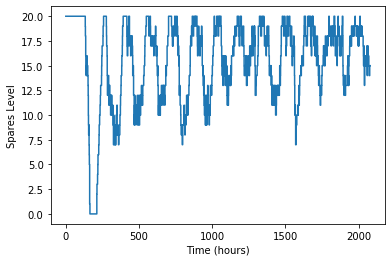

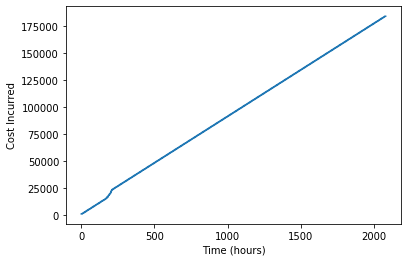

Total cost was 184024.92


In [26]:
import matplotlib.pyplot as plt

plt.figure()
plt.step(obs_time, obs_spares, where='post')
plt.xlabel('Time (hours)')
plt.ylabel('Spares Level')

plt.figure()
plt.step(obs_time, obs_cost, where='post')
plt.xlabel('Time (hours)')
plt.ylabel('Cost Incurred')

plt.show()

print('Total cost was {:.2f}'.format(obs_cost[-1]))

4.  Justify the validity of the model and discuss how you verified it.

Note: you may need to restart the kernel to use updated packages.


5.  State  your conclusions/ findings from the model. 

6.  Generate appropriate graphs (more than one) to illustrate the results and provide a PowerPoint presentation to share with your colleagues.  
Post this to the discussion. 

Be sure that your code works!